# Telco Customer Churn - Classification Model

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


In [2]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data Cleaning
df.drop('customerID', axis=1, inplace=True) 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encoding categorical variables
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])
    

In [4]:
# Classification Task - Predicting Churn
x_class = df.drop('Churn', axis=1)
y_class = df['Churn']


In [5]:
# Feature Selection (Chi-Square)
selector_class = SelectKBest(score_func=chi2, k=10)
selector_class.fit(x_class, y_class)
selected_features_class = x_class.columns[selector_class.get_support()]
print("Classification Selected Features:\n", selected_features_class.tolist())

x_class_selected = x_class[selected_features_class]


Classification Selected Features:
 ['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges']


In [6]:
# Train-Test Split
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(
    x_class_selected, y_class, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
x_train_class = scaler.fit_transform(x_train_class)
x_test_class = scaler.transform(x_test_class)



In [7]:
# Model Training
clf = RandomForestClassifier()
clf.fit(x_train_class, y_train_class)

# Prediction
y_pred_c = clf.predict(x_test_class)



Accuracy: 0.7803837953091685

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



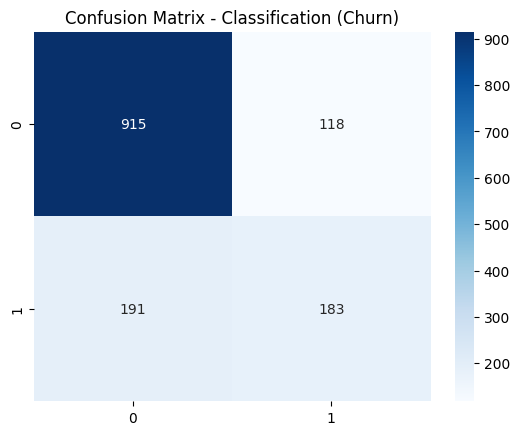

In [8]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_test_class, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_c))

sns.heatmap(confusion_matrix(y_test_class, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Classification (Churn)")
plt.show()


# Telco Customer Monthly Charges - Regression Model

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [10]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Data Cleaning
df.drop('customerID', axis=1, inplace=True) 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encoding categorical variables
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])


In [12]:
# Regression Task - Predicting Monthly Charges
x_reg = df.drop('MonthlyCharges', axis=1)
y_reg = df['MonthlyCharges']


In [13]:
# Feature Selection
selector_reg = SelectKBest(score_func=f_regression, k=10)
x_reg_selected = selector_reg.fit_transform(x_reg, y_reg)
selected_features_reg = x_reg.columns[selector_reg.get_support()]
print("Selected features for regression:\n", selected_features_reg.tolist())


Selected features for regression:
 ['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'TotalCharges', 'Churn']


In [14]:
# Train-Test Split
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(df[selected_features_reg], y_reg, test_size=0.2, random_state=42)


In [15]:
# Scaling
scaler = StandardScaler()
x_train_reg = scaler.fit_transform(x_train_reg)
x_test_reg = scaler.transform(x_test_reg)

# Train Model
reg = RandomForestRegressor()
reg.fit(x_train_reg, y_train_reg)

# Predict
y_pred_reg = reg.predict(x_test_reg)


In [16]:
# Evaluate
print('\n Regression Evaluation:')
print('\n Regression Mean Absolute Error:', mean_absolute_error(y_test_reg, y_pred_reg))
print('\n Regression Mean Squared Error:', mean_squared_error(y_test_reg, y_pred_reg))
print('\n Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print('\n Regression R2 Score:', r2_score(y_test_reg, y_pred_reg))



 Regression Evaluation:

 Regression Mean Absolute Error: 2.0560543337733113

 Regression Mean Squared Error: 9.395741639347754

 Regression Root Mean Squared Error: 3.0652474026329024

 Regression R2 Score: 0.989368600839882


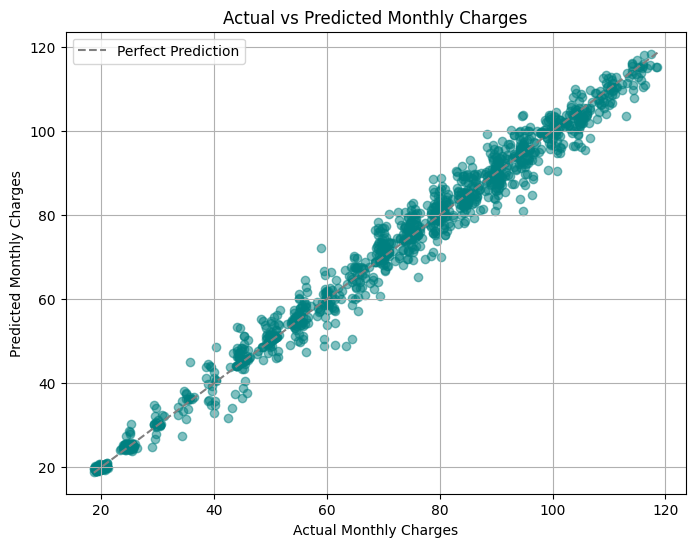

In [17]:
# Plotting Actual vs Predicted Monthly Charges
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='teal')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--', color='gray', label='Perfect Prediction')
plt.title('Actual vs Predicted Monthly Charges')
plt.xlabel('Actual Monthly Charges')
plt.ylabel('Predicted Monthly Charges')
plt.legend()
plt.grid(True)
plt.show()
